In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('Superstore.csv',  encoding= 'latin1')

In [3]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [5]:
data.nunique()

Row ID           9994
Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            5825
Quantity           14
Discount           12
Profit           7287
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

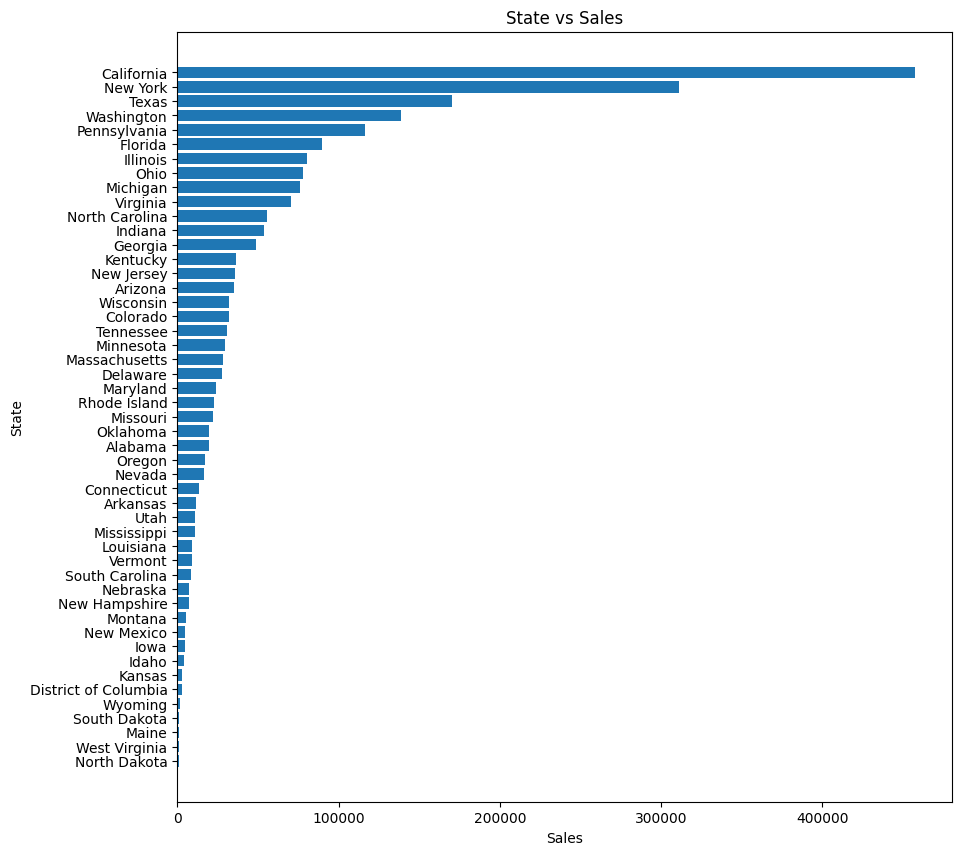

In [7]:
#State wise sales analysis
bar = data.loc[:, ['State', 'Sales']]
bar_df = bar.groupby('State').sum().reset_index()
bar_df = bar_df.sort_values(by=['Sales'])

plt.figure(figsize=(10,10))
plt.barh(bar_df['State'], bar_df['Sales'])
plt.title('State vs Sales')
plt.xlabel('Sales')
plt.ylabel('State')
plt.show()

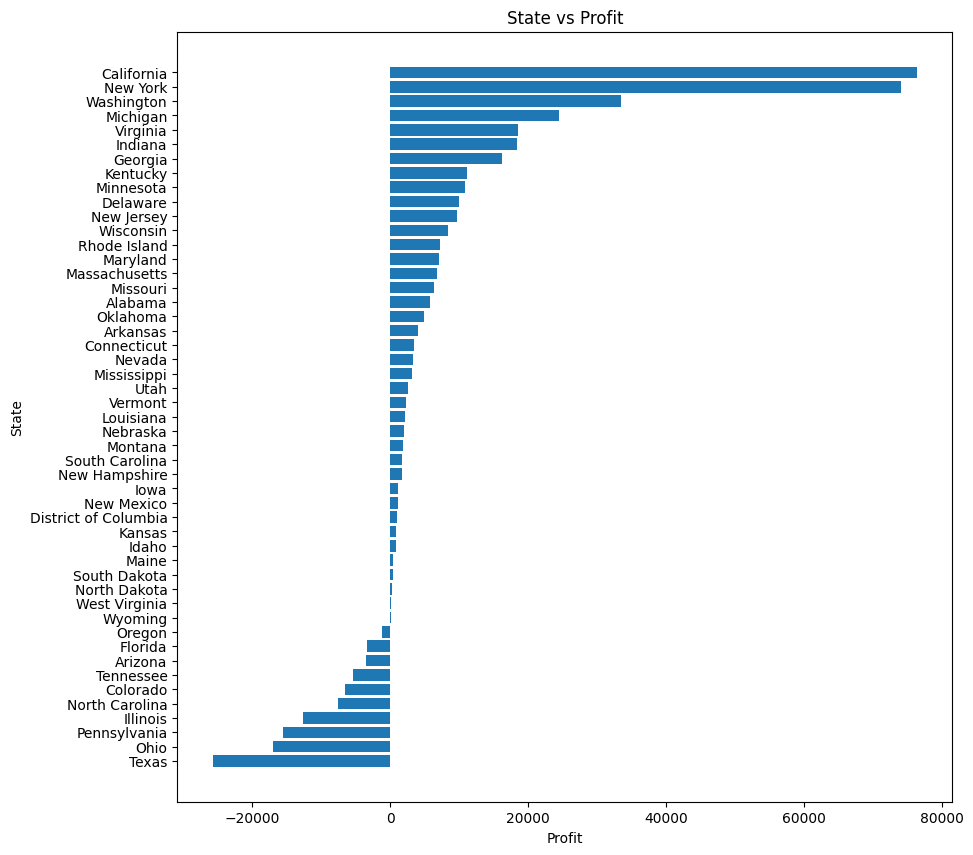

In [8]:
#State wise sales analysis
bar = data.loc[:, ['State', 'Profit']]
bar_df = bar.groupby('State').sum().reset_index()
bar_df = bar_df.sort_values(by=['Profit'])

plt.figure(figsize=(10,10))
plt.barh(bar_df['State'], bar_df['Profit'])
plt.title('State vs Profit')
plt.xlabel('Profit')
plt.ylabel('State')
plt.show()

In [10]:
#Product catrgory sales analysis
pie_df = data.loc[:, ['Category', 'Sales']]
pie_df = pie_df.groupby('Category').sum()
print(pie_df)

                       Sales
Category                    
Furniture        741999.7953
Office Supplies  719047.0320
Technology       836154.0330


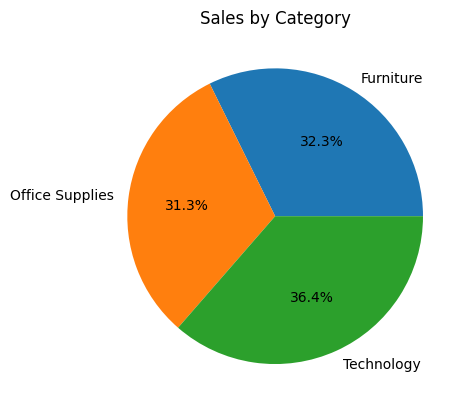

In [11]:
plt.pie(pie_df['Sales'], labels=pie_df.index, autopct='%1.1f%%')
plt.title('Sales by Category')
plt.show()

       Segment  Quantity
0     Consumer     19521
1    Corporate     11608
2  Home Office      6744


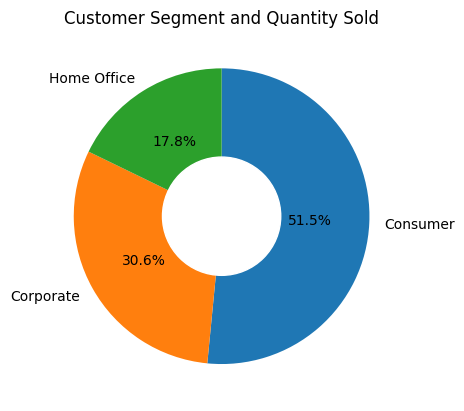

In [12]:
#Segment vise quantity sold 
dn_df = data.loc[:, ['Segment', 'Quantity']]
dn_df = dn_df.groupby('Segment').sum().reset_index()
print(dn_df)

fig, ax = plt.subplots()
labels = dn_df['Segment']
sizes = dn_df['Quantity']
ax.pie(sizes, labels=labels, autopct='%1.1f%%', 
       startangle=90, counterclock=False, 
       wedgeprops={'width': 0.7})
circle = plt.Circle((0, 0), 0.4, color='white')
ax.add_artist(circle)
plt.title('Customer Segment and Quantity Sold')
plt.show()

In [14]:
#Top customers
group_data = data.groupby(['Customer ID', 'Customer Name']).sum().reset_index()
loyal_cust = group_data.loc[:, ['Customer ID', 'Customer Name', 'Quantity']]
top_loyal_cust = loyal_cust.sort_values('Quantity', ascending=False).head(10)
print(top_loyal_cust)

    Customer ID        Customer Name  Quantity
349    JD-15895     Jonathan Doherty       150
787    WB-21850        William Brown       146
387    JL-15835             John Lee       143
606    PP-18955           Paul Prost       138
678    SC-20725    Steven Cartwright       133
275    EP-13915           Emily Phan       124
125    CB-12025    Cassandra Brandow       122
147    CK-12205  Chloris Kastensmidt       122
257    EH-13765         Edward Hooks       120
482    MA-17560         Matt Abelman       117


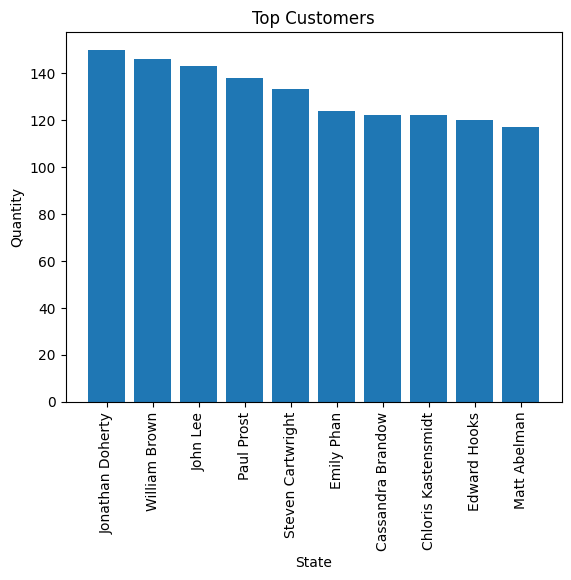

In [15]:
plt.bar(top_loyal_cust['Customer Name'], top_loyal_cust['Quantity'])
plt.xticks(rotation=90)
plt.title('Top Customers')
plt.xlabel('State')
plt.ylabel('Quantity')
plt.show()

In [18]:
#List of 5 sub categoris from each category, rank based on total quantity sold in   New York to optimize stock for new store opening in NY
sales_ny = data.loc[data['State'] == 'New York']
subcategory_profit = sales_ny.groupby(['Category','Sub-Category'])['Quantity'].sum().reset_index()
subcategories_ranked = subcategory_profit.sort_values(['Category', 'Quantity'], ascending=False).groupby('Category').head(5)
print("The top 5 subcategories for each category, ranked by total quantity sold in New York are:")
print(subcategories_ranked[['Category', 'Sub-Category', 'Quantity']])

The top 5 subcategories for each category, ranked by total quantity sold in New York are:
           Category Sub-Category  Quantity
16       Technology       Phones       393
13       Technology  Accessories       276
15       Technology     Machines        73
14       Technology      Copiers        20
6   Office Supplies      Binders       696
10  Office Supplies        Paper       565
11  Office Supplies      Storage       356
5   Office Supplies          Art       336
9   Office Supplies       Labels       178
2         Furniture  Furnishings       356
1         Furniture       Chairs       313
0         Furniture    Bookcases       113
3         Furniture       Tables        95


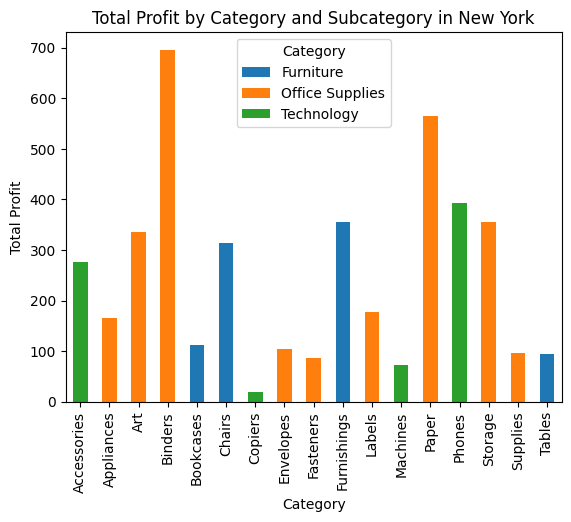

In [19]:
#Visualising profitability
subcategory_pivot = subcategory_profit.pivot(index='Sub-Category', columns='Category', values='Quantity')
subcategory_pivot.plot(kind='bar', stacked=True)
plt.title("Total Profit by Category and Subcategory in New York")
plt.xlabel("Category")
plt.ylabel("Total Profit")
plt.show()

In [20]:
#Monthly Sales Trend Analysis
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%m/%d/%Y')
monthly_sales = data.groupby(pd.Grouper(key='Order Date', freq='M'))['Sales'].sum().reset_index()

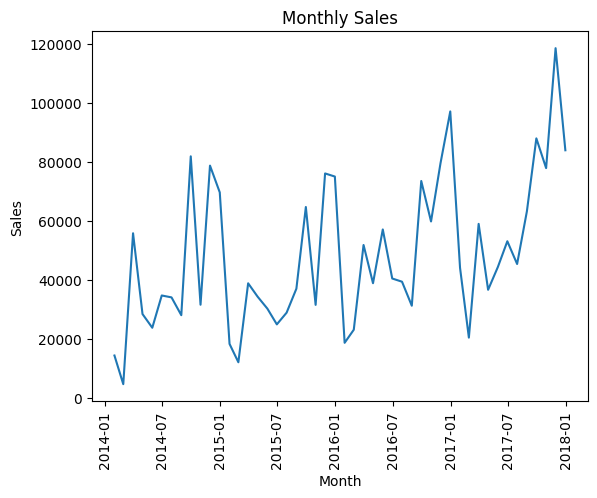

In [21]:
plt.plot(monthly_sales['Order Date'], monthly_sales['Sales'])
plt.xlabel('Month')
plt.xticks(rotation=90)
plt.ylabel('Sales')
plt.title('Monthly Sales')
plt.show()

In [22]:
f_df = data.loc[:, ['Order Date', 'Sales']]
forecast_df = f_df.groupby(['Order Date'])['Sales'].sum().reset_index()
forecast_df = forecast_df.sort_values(by='Order Date')
print(forecast_df)

     Order Date      Sales
0    2014-01-03    16.4480
1    2014-01-04   288.0600
2    2014-01-05    19.5360
3    2014-01-06  4407.1000
4    2014-01-07    87.1580
...         ...        ...
1232 2017-12-26   814.5940
1233 2017-12-27   177.6360
1234 2017-12-28  1657.3508
1235 2017-12-29  2915.5340
1236 2017-12-30   713.7900

[1237 rows x 2 columns]


In [23]:
forecast_df.set_index('Order Date', inplace=True)

In [24]:
forecast_df

,Sales
Order Date,
2014-01-03,16.4480
2014-01-04,288.0600
2014-01-05,19.5360
2014-01-06,4407.1000
2014-01-07,87.1580
...,...
2017-12-26,814.5940
2017-12-27,177.6360
2017-12-28,1657.3508


In [25]:
result = adfuller(forecast_df['Sales']) #Test for staionarity  of data
print('p-value: ',result[1] <0.05)

p-value:  True


Data is stationary

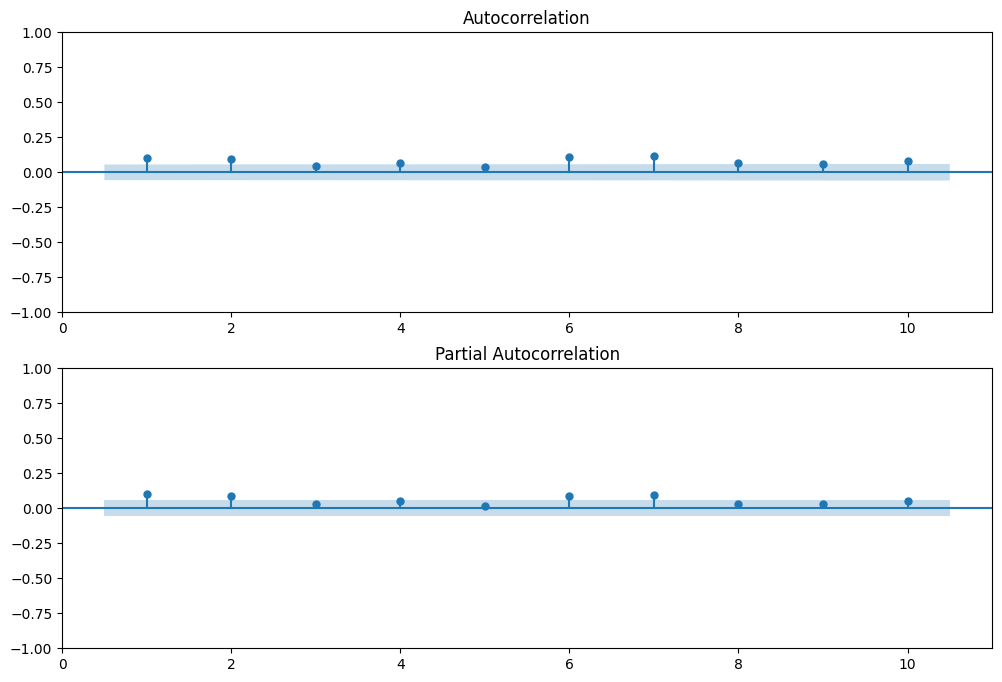

In [26]:
#Identifying order of model
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))

#plot acf
plot_acf(forecast_df['Sales'], lags=10, zero=False, ax=ax1)
# Plot the PACF of savings on ax2
plot_pacf(forecast_df['Sales'], lags=10, zero=False, ax=ax2)
plt.show()

In [27]:
#forecast_df['Sales'] = np.log(forecast_df['Sales'])

In [28]:
# Create empty list to store search results
order_aic_bic=[]

# Loop over p values from 0-3
for p in range(4):
  # Loop over q values from 0-3
    for q in range(4):
      	# create and fit ARMA(p,q) model
        model = ARIMA(forecast_df['Sales'], order=(p,0,q))
        results = model.fit()
        
        # Append order and results tuple
        order_aic_bic.append((p,q, results.aic, results.bic))

# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic, 
                        columns=['p', 'q', 'AIC', 'BIC'])


# Print order_df in order of increasing BIC
print(order_df.sort_values(by ='BIC', ascending=True))

    p  q           AIC           BIC
5   1  1  22619.053630  22639.535408
9   2  1  22620.375561  22645.977783
6   1  2  22620.849428  22646.451650
7   1  3  22621.814509  22652.537175
13  3  1  22622.217227  22652.939894
10  2  2  22623.045849  22653.768515
11  2  3  22622.414158  22658.257269
14  3  2  22622.637539  22658.480649
15  3  3  22619.171577  22660.135132
8   2  0  22650.368262  22670.850040
2   0  2  22652.581512  22673.063290
4   1  0  22658.051262  22673.412595
1   0  1  22660.164995  22675.526328
12  3  0  22651.447079  22677.049301
3   0  3  22653.358720  22678.960942
0   0  0  22669.848603  22680.089491


In [29]:
train_size = int(forecast_df.shape[0] - 30)
train = forecast_df[0:train_size]
test = forecast_df[train_size:]

In [30]:
model = ARIMA(train["Sales"], order=(1, 0, 1))
model_fit = model.fit()
forecast_values = model_fit.get_forecast(steps=30)
forecasted_sales = forecast_values.predicted_mean


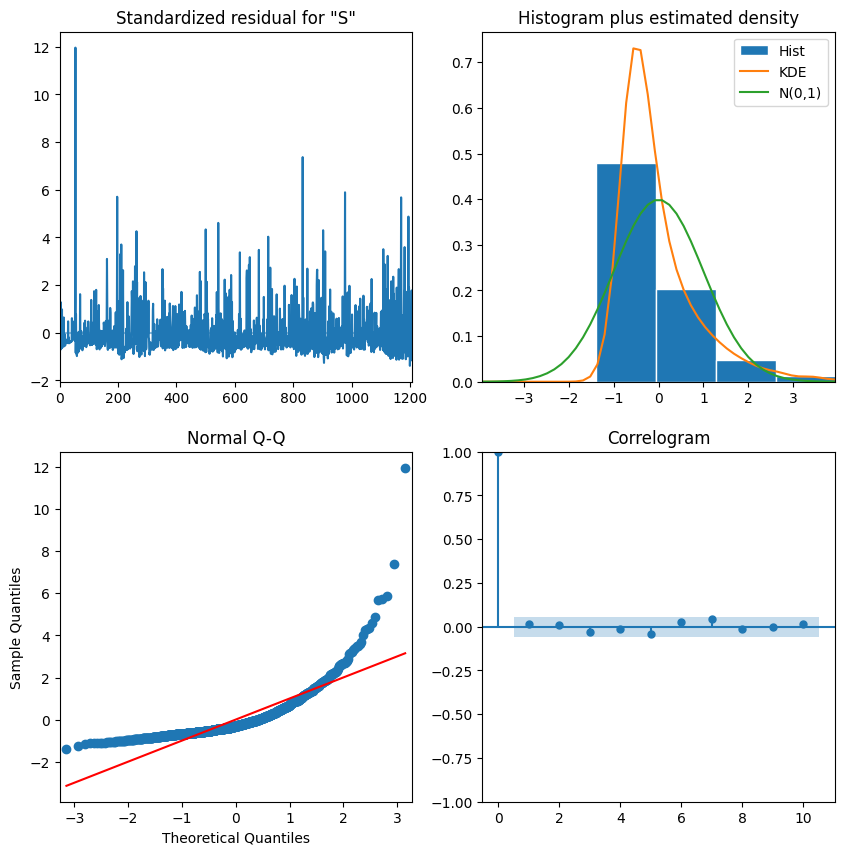

In [31]:

model_fit.plot_diagnostics(figsize=(10,10))
plt.show()

In [32]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                 1207
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -11027.745
Date:                Tue, 16 Apr 2024   AIC                          22063.490
Time:                        11:48:25   BIC                          22083.873
Sample:                             0   HQIC                         22071.166
                               - 1207                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1828.9966    271.278      6.742      0.000    1297.302    2360.691
ar.L1          0.9758      0.013     77.893      0.000       0.951       1.000
ma.L1         -0.9297      0.023    -39.680      0.0

In [34]:
#creating forecast index
forecasted_index = pd.date_range(start=train.index[-1] + 
                                 pd.DateOffset(days=1), 
                                 periods=len(forecasted_sales))

In [35]:
actual_values = test['Sales'] #retrieve actual sales values

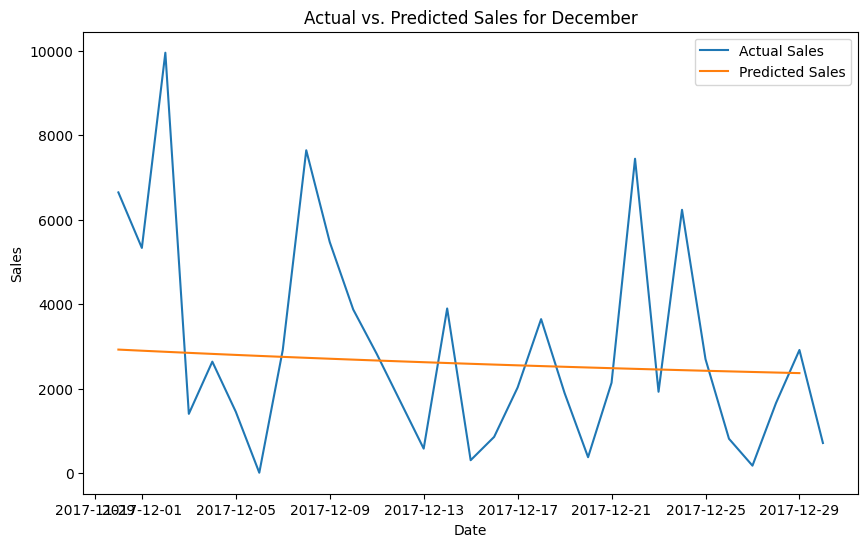

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(actual_values.index, actual_values, label='Actual Sales')
plt.plot(forecasted_index, forecasted_sales, label='Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs. Predicted Sales for December')
plt.legend()
plt.show()

In [37]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_sarima = SARIMAX(forecast_df['Sales'], order=(1, 0, 1), seasonal_order=(2, 0, 1, 12))
fitted_model_sarima = model_sarima.fit()
forecast_sarima = fitted_model_sarima.get_prediction(start=-30)  # Forecast for next 12 periods


In [38]:


forecast_sarima= fitted_model_sarima.get_forecast(steps=30)
mean_forecast_sarima = forecast_sarima.predicted_mean
#print(mean_forecast_sarima)

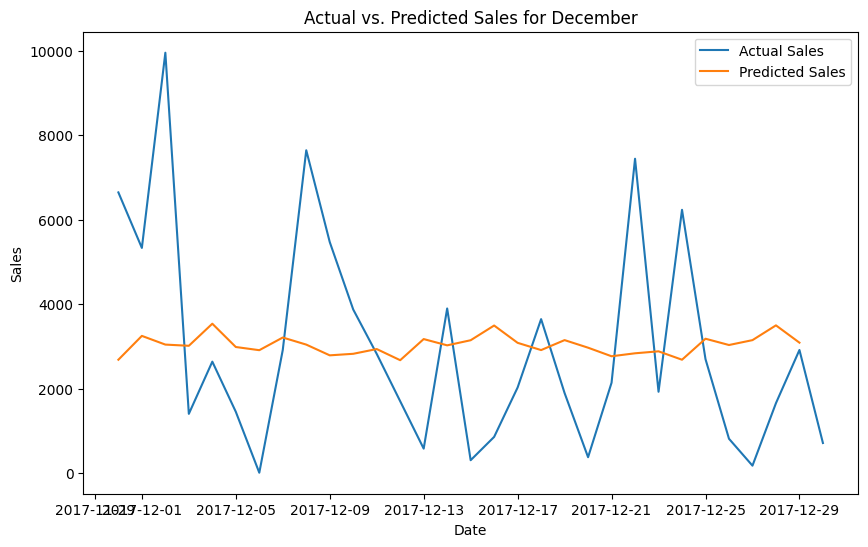

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(actual_values.index, actual_values, label='Actual Sales')
plt.plot(forecasted_index, mean_forecast_sarima, label='Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs. Predicted Sales for December')
plt.legend()
plt.show()

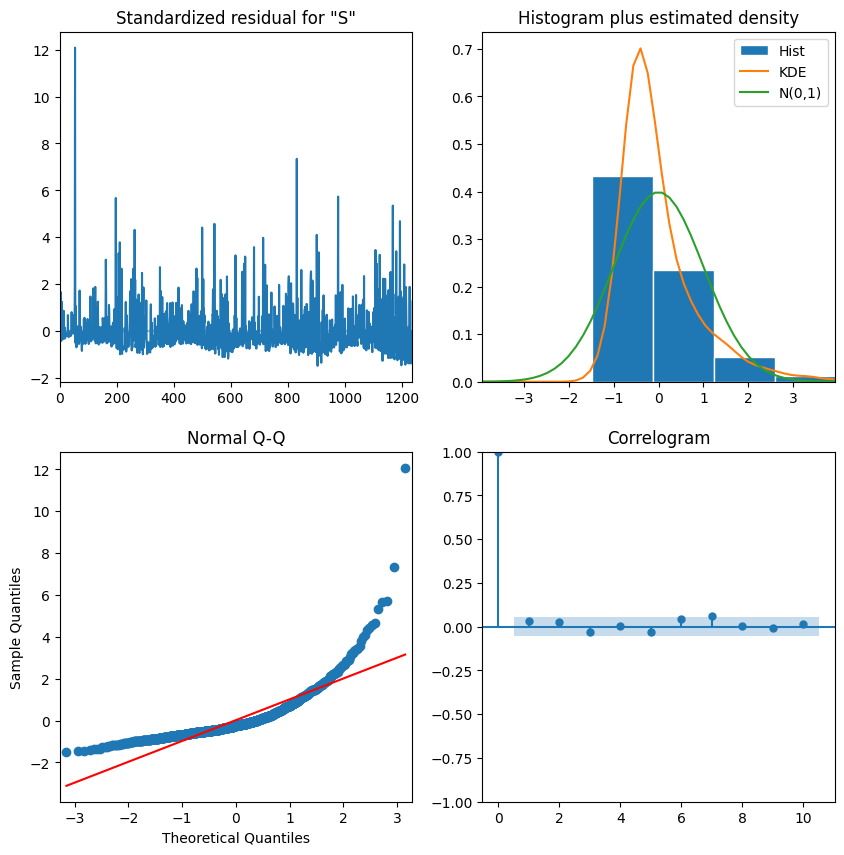

In [40]:
fitted_model_sarima.plot_diagnostics(figsize=(10,10))
plt.show()